---

_You are currently looking at **version 1.0** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

## Assignment 4 - Understanding and Predicting Property Maintenance Fines

This assignment is based on a data challenge from the Michigan Data Science Team ([MDST](http://midas.umich.edu/mdst/)). 

The Michigan Data Science Team ([MDST](http://midas.umich.edu/mdst/)) and the Michigan Student Symposium for Interdisciplinary Statistical Sciences ([MSSISS](https://sites.lsa.umich.edu/mssiss/)) have partnered with the City of Detroit to help solve one of the most pressing problems facing Detroit - blight. [Blight violations](http://www.detroitmi.gov/How-Do-I/Report/Blight-Complaint-FAQs) are issued by the city to individuals who allow their properties to remain in a deteriorated condition. Every year, the city of Detroit issues millions of dollars in fines to residents and every year, many of these fines remain unpaid. Enforcing unpaid blight fines is a costly and tedious process, so the city wants to know: how can we increase blight ticket compliance?

The first step in answering this question is understanding when and why a resident might fail to comply with a blight ticket. This is where predictive modeling comes in. For this assignment, your task is to predict whether a given blight ticket will be paid on time.

All data for this assignment has been provided to us through the [Detroit Open Data Portal](https://data.detroitmi.gov/). **Only the data already included in your Coursera directory can be used for training the model for this assignment.** Nonetheless, we encourage you to look into data from other Detroit datasets to help inform feature creation and model selection. We recommend taking a look at the following related datasets:

* [Building Permits](https://data.detroitmi.gov/Property-Parcels/Building-Permits/xw2a-a7tf)
* [Trades Permits](https://data.detroitmi.gov/Property-Parcels/Trades-Permits/635b-dsgv)
* [Improve Detroit: Submitted Issues](https://data.detroitmi.gov/Government/Improve-Detroit-Submitted-Issues/fwz3-w3yn)
* [DPD: Citizen Complaints](https://data.detroitmi.gov/Public-Safety/DPD-Citizen-Complaints-2016/kahe-efs3)
* [Parcel Map](https://data.detroitmi.gov/Property-Parcels/Parcel-Map/fxkw-udwf)

___

We provide you with two data files for use in training and validating your models: train.csv and test.csv. Each row in these two files corresponds to a single blight ticket, and includes information about when, why, and to whom each ticket was issued. The target variable is compliance, which is True if the ticket was paid early, on time, or within one month of the hearing data, False if the ticket was paid after the hearing date or not at all, and Null if the violator was found not responsible. Compliance, as well as a handful of other variables that will not be available at test-time, are only included in train.csv.

Note: All tickets where the violators were found not responsible are not considered during evaluation. They are included in the training set as an additional source of data for visualization, and to enable unsupervised and semi-supervised approaches. However, they are not included in the test set.

<br>

**File descriptions** (Use only this data for training your model!)

    train.csv - the training set (all tickets issued 2004-2011)
    test.csv - the test set (all tickets issued 2012-2016)
    addresses.csv & latlons.csv - mapping from ticket id to addresses, and from addresses to lat/lon coordinates. 
     Note: misspelled addresses may be incorrectly geolocated.

<br>

**Data fields**

train.csv & test.csv

    ticket_id - unique identifier for tickets
    agency_name - Agency that issued the ticket
    inspector_name - Name of inspector that issued the ticket
    violator_name - Name of the person/organization that the ticket was issued to
    violation_street_number, violation_street_name, violation_zip_code - Address where the violation occurred
    mailing_address_str_number, mailing_address_str_name, city, state, zip_code, non_us_str_code, country - Mailing address of the violator
    ticket_issued_date - Date and time the ticket was issued
    hearing_date - Date and time the violator's hearing was scheduled
    violation_code, violation_description - Type of violation
    disposition - Judgment and judgement type
    fine_amount - Violation fine amount, excluding fees
    admin_fee - $20 fee assigned to responsible judgments
state_fee - $10 fee assigned to responsible judgments
    late_fee - 10% fee assigned to responsible judgments
    discount_amount - discount applied, if any
    clean_up_cost - DPW clean-up or graffiti removal cost
    judgment_amount - Sum of all fines and fees
    grafitti_status - Flag for graffiti violations
    
train.csv only

    payment_amount - Amount paid, if any
    payment_date - Date payment was made, if it was received
    payment_status - Current payment status as of Feb 1 2017
    balance_due - Fines and fees still owed
    collection_status - Flag for payments in collections
    compliance [target variable for prediction] 
     Null = Not responsible
     0 = Responsible, non-compliant
     1 = Responsible, compliant
    compliance_detail - More information on why each ticket was marked compliant or non-compliant


___

## Evaluation

Your predictions will be given as the probability that the corresponding blight ticket will be paid on time.

The evaluation metric for this assignment is the Area Under the ROC Curve (AUC). 

Your grade will be based on the AUC score computed for your classifier. A model which with an AUROC of 0.7 passes this assignment, over 0.75 will recieve full points.
___

For this assignment, create a function that trains a model to predict blight ticket compliance in Detroit using `train.csv`. Using this model, return a series of length 61001 with the data being the probability that each corresponding ticket from `test.csv` will be paid, and the index being the ticket_id.

Example:

    ticket_id
       284932    0.531842
       285362    0.401958
       285361    0.105928
       285338    0.018572
                 ...
       376499    0.208567
       376500    0.818759
       369851    0.018528
       Name: compliance, dtype: float32

In [1]:
import pandas as pd
import numpy as np

def blight_model():
    
    # Your code here
    
    return # Your answer here

In [2]:
df_train = pd.read_csv('train.csv', encoding = "ISO-8859-1")
df_test = pd.read_csv('test.csv', encoding = "ISO-8859-1")

df_train.columns

/home/fuyang/Workspace/coursera-Applied-Machine-Learning-in-Python/venv/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (11,12,31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index(['ticket_id', 'agency_name', 'inspector_name', 'violator_name',
       'violation_street_number', 'violation_street_name',
       'violation_zip_code', 'mailing_address_str_number',
       'mailing_address_str_name', 'city', 'state', 'zip_code',
       'non_us_str_code', 'country', 'ticket_issued_date', 'hearing_date',
       'violation_code', 'violation_description', 'disposition', 'fine_amount',
       'admin_fee', 'state_fee', 'late_fee', 'discount_amount',
       'clean_up_cost', 'judgment_amount', 'payment_amount', 'balance_due',
       'payment_date', 'payment_status', 'collection_status',
       'grafitti_status', 'compliance_detail', 'compliance'],
      dtype='object')

In [3]:
list_to_remove = ['balance_due',
 'collection_status',
 'compliance_detail',
 'payment_amount',
 'payment_date',
 'payment_status']

list_to_remove_all = ['violator_name', 'zip_code', 'country', 'city',
                      'inspector_name', 'violation_street_number', 'violation_street_name',
                      'violation_zip_code', 'violation_description',
                      'mailing_address_str_number', 'mailing_address_str_name',
                      'non_us_str_code',
                      'ticket_issued_date', 'hearing_date']

In [4]:
df_train.drop(list_to_remove, axis=1, inplace=True)
df_train.drop(list_to_remove_all, axis=1, inplace=True)
df_test.drop(list_to_remove_all, axis=1, inplace=True)

In [5]:
df_train.head()

,ticket_id,agency_name,state,violation_code,disposition,fine_amount,admin_fee,state_fee,late_fee,discount_amount,clean_up_cost,judgment_amount,grafitti_status,compliance
0,22056,"Buildings, Safety Engineering & Env Department",IL,9-1-36(a),Responsible by Default,250.0,20.0,10.0,25.0,0.0,0.0,305.0,NaN,0.0
1,27586,"Buildings, Safety Engineering & Env Department",MI,61-63.0600,Responsible by Determination,750.0,20.0,10.0,75.0,0.0,0.0,855.0,NaN,1.0
2,22062,"Buildings, Safety Engineering & Env Department",MI,9-1-36(a),Not responsible by Dismissal,250.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
3,22084,"Buildings, Safety Engineering & Env Department",MI,9-1-36(a),Not responsible by City Dismissal,250.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
4,22093,"Buildings, Safety Engineering & Env Department",MI,9-1-36(a),Not responsible by Dismissal,250.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN


In [6]:
df_train.violation_code.unique().size

235

In [7]:
df_train.disposition.unique().size

9

In [8]:
df_latlons = pd.read_csv('latlons.csv')

In [9]:
df_latlons.head()

,address,lat,lon
0,"4300 rosa parks blvd, Detroit MI 48208",42.346169,-83.079962
1,"14512 sussex, Detroit MI",42.394657,-83.194265
2,"3456 garland, Detroit MI",42.373779,-82.986228
3,"5787 wayburn, Detroit MI",42.403342,-82.957805
4,"5766 haverhill, Detroit MI",42.407255,-82.946295


In [10]:
df_address =  pd.read_csv('addresses.csv')
df_address.head()

,ticket_id,address
0,22056,"2900 tyler, Detroit MI"
1,27586,"4311 central, Detroit MI"
2,22062,"1449 longfellow, Detroit MI"
3,22084,"1441 longfellow, Detroit MI"
4,22093,"2449 churchill, Detroit MI"


In [11]:
df_id_latlons = df_address.set_index('address').join(df_latlons.set_index('address'))

In [12]:
df_id_latlons.head()

,ticket_id,lat,lon
address,,,
"-11064 gratiot, Detroit MI",328722,42.406935,-82.995599
"-11871 wilfred, Detroit MI",350971,42.411288,-82.993674
"-15126 harper, Detroit MI",344821,42.406402,-82.957525
"0 10th st, Detroit MI",24928,42.325689,-83.064330
"0 10th st, Detroit MI",71887,42.325689,-83.064330


In [13]:
df_train = df_train.set_index('ticket_id').join(df_id_latlons.set_index('ticket_id'))
df_test = df_test.set_index('ticket_id').join(df_id_latlons.set_index('ticket_id'))

In [14]:
df_train.head()

,agency_name,state,violation_code,disposition,fine_amount,admin_fee,state_fee,late_fee,discount_amount,clean_up_cost,judgment_amount,grafitti_status,compliance,lat,lon
ticket_id,,,,,,,,,,,,,,,
22056,"Buildings, Safety Engineering & Env Department",IL,9-1-36(a),Responsible by Default,250.0,20.0,10.0,25.0,0.0,0.0,305.0,NaN,0.0,42.390729,-83.124268
27586,"Buildings, Safety Engineering & Env Department",MI,61-63.0600,Responsible by Determination,750.0,20.0,10.0,75.0,0.0,0.0,855.0,NaN,1.0,42.326937,-83.135118
22062,"Buildings, Safety Engineering & Env Department",MI,9-1-36(a),Not responsible by Dismissal,250.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,42.380516,-83.096069
22084,"Buildings, Safety Engineering & Env Department",MI,9-1-36(a),Not responsible by City Dismissal,250.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,42.380570,-83.095919
22093,"Buildings, Safety Engineering & Env Department",MI,9-1-36(a),Not responsible by Dismissal,250.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,42.145257,-83.208233


In [15]:
df_train.agency_name.value_counts()

Buildings, Safety Engineering & Env Department    157784
Department of Public Works                         74717
Health Department                                   8903
Detroit Police Department                           8900
Neighborhood City Halls                                2
Name: agency_name, dtype: int64

In [16]:
# df_train.country.value_counts()
# so we remove zip code and country as well

In [17]:
vio_code_freq10 = df_train.violation_code.value_counts().index[0:10]
vio_code_freq10

Index(['9-1-36(a)', '9-1-81(a)', '22-2-88', '9-1-104', '22-2-88(b)', '22-2-45',
       '9-1-43(a) - (Dwellin', '9-1-105', '9-1-110(a)', '22-2-22'],
      dtype='object')

In [18]:
df_train['violation_code_freq10'] = [list(vio_code_freq10).index(c) if c in vio_code_freq10 else -1 for c in df_train.violation_code ]

In [19]:
df_train.head()

,agency_name,state,violation_code,disposition,fine_amount,admin_fee,state_fee,late_fee,discount_amount,clean_up_cost,judgment_amount,grafitti_status,compliance,lat,lon,violation_code_freq10
ticket_id,,,,,,,,,,,,,,,,
22056,"Buildings, Safety Engineering & Env Department",IL,9-1-36(a),Responsible by Default,250.0,20.0,10.0,25.0,0.0,0.0,305.0,NaN,0.0,42.390729,-83.124268,0
27586,"Buildings, Safety Engineering & Env Department",MI,61-63.0600,Responsible by Determination,750.0,20.0,10.0,75.0,0.0,0.0,855.0,NaN,1.0,42.326937,-83.135118,-1
22062,"Buildings, Safety Engineering & Env Department",MI,9-1-36(a),Not responsible by Dismissal,250.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,42.380516,-83.096069,0
22084,"Buildings, Safety Engineering & Env Department",MI,9-1-36(a),Not responsible by City Dismissal,250.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,42.380570,-83.095919,0
22093,"Buildings, Safety Engineering & Env Department",MI,9-1-36(a),Not responsible by Dismissal,250.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,42.145257,-83.208233,0


In [20]:
df_train.violation_code_freq10.value_counts()

 0    99091
 1    43471
 2    28720
-1    24883
 3    22536
 4     7238
 5     5394
 6     5332
 7     5072
 8     4814
 9     3755
Name: violation_code_freq10, dtype: int64

In [21]:
# drop violation code

df_train.drop('violation_code', axis=1, inplace=True)

df_test['violation_code_freq10'] = [list(vio_code_freq10).index(c) if c in vio_code_freq10 else -1 for c in df_test.violation_code ]
df_test.drop('violation_code', axis=1, inplace=True)

In [22]:
df_train.grafitti_status.fillna('None', inplace=True)
df_test.grafitti_status.fillna('None', inplace=True)

In [23]:
df_train = df_train[df_train.compliance.isnull() == False]

In [24]:
df_train.isnull().sum()

agency_name               0
state                    84
disposition               0
fine_amount               0
admin_fee                 0
state_fee                 0
late_fee                  0
discount_amount           0
clean_up_cost             0
judgment_amount           0
grafitti_status           0
compliance                0
lat                       2
lon                       2
violation_code_freq10     0
dtype: int64

In [25]:
df_test.isnull().sum()

agency_name                0
state                    331
disposition                0
fine_amount                0
admin_fee                  0
state_fee                  0
late_fee                   0
discount_amount            0
clean_up_cost              0
judgment_amount            0
grafitti_status            0
lat                        5
lon                        5
violation_code_freq10      0
dtype: int64

In [26]:
df_train.lat.fillna(method='pad', inplace=True)
df_train.lon.fillna(method='pad', inplace=True)
df_train.state.fillna(method='pad', inplace=True)

df_test.lat.fillna(method='pad', inplace=True)
df_test.lon.fillna(method='pad', inplace=True)
df_test.state.fillna(method='pad', inplace=True)

In [27]:
df_train.isnull().sum().sum()

0

In [28]:
df_test.isnull().sum().sum()

0

## 

In [29]:
df_train.head()

,agency_name,state,disposition,fine_amount,admin_fee,state_fee,late_fee,discount_amount,clean_up_cost,judgment_amount,grafitti_status,compliance,lat,lon,violation_code_freq10
ticket_id,,,,,,,,,,,,,,,
22056,"Buildings, Safety Engineering & Env Department",IL,Responsible by Default,250.0,20.0,10.0,25.0,0.0,0.0,305.0,None,0.0,42.390729,-83.124268,0
27586,"Buildings, Safety Engineering & Env Department",MI,Responsible by Determination,750.0,20.0,10.0,75.0,0.0,0.0,855.0,None,1.0,42.326937,-83.135118,-1
22046,"Buildings, Safety Engineering & Env Department",CA,Responsible by Default,250.0,20.0,10.0,25.0,0.0,0.0,305.0,None,0.0,42.145257,-83.208233,0
18738,"Buildings, Safety Engineering & Env Department",MI,Responsible by Default,750.0,20.0,10.0,75.0,0.0,0.0,855.0,None,0.0,42.433466,-83.023493,-1
18735,"Buildings, Safety Engineering & Env Department",MI,Responsible by Default,100.0,20.0,10.0,10.0,0.0,0.0,140.0,None,0.0,42.388641,-83.037858,-1


In [30]:
one_hot_encode_columns = ['agency_name', 'state', 'disposition', 'grafitti_status']


In [31]:
[ df_train[c].unique().size for c in one_hot_encode_columns]

[5, 59, 4, 1]

In [32]:
# So remove city and states...

In [33]:
one_hot_encode_columns = ['agency_name', 'state', 'disposition', 'grafitti_status']

df_train = pd.get_dummies(df_train, columns=one_hot_encode_columns)
df_test = pd.get_dummies(df_test, columns=one_hot_encode_columns)

In [34]:
df_train.head()

,fine_amount,admin_fee,state_fee,late_fee,discount_amount,clean_up_cost,judgment_amount,compliance,lat,lon,...,state_VT,state_WA,state_WI,state_WV,state_WY,disposition_Responsible (Fine Waived) by Deter,disposition_Responsible by Admission,disposition_Responsible by Default,disposition_Responsible by Determination,grafitti_status_None
ticket_id,,,,,,,,,,,,,,,,,,,,,
22056,250.0,20.0,10.0,25.0,0.0,0.0,305.0,0.0,42.390729,-83.124268,...,0,0,0,0,0,0,0,1,0,1
27586,750.0,20.0,10.0,75.0,0.0,0.0,855.0,1.0,42.326937,-83.135118,...,0,0,0,0,0,0,0,0,1,1
22046,250.0,20.0,10.0,25.0,0.0,0.0,305.0,0.0,42.145257,-83.208233,...,0,0,0,0,0,0,0,1,0,1
18738,750.0,20.0,10.0,75.0,0.0,0.0,855.0,0.0,42.433466,-83.023493,...,0,0,0,0,0,0,0,1,0,1
18735,100.0,20.0,10.0,10.0,0.0,0.0,140.0,0.0,42.388641,-83.037858,...,0,0,0,0,0,0,0,1,0,1


## Train, keep, test split

In [43]:
from sklearn.model_selection import train_test_split
train_features = df_train.columns.drop('compliance')
train_features

Index(['fine_amount', 'admin_fee', 'state_fee', 'late_fee', 'discount_amount',
       'clean_up_cost', 'judgment_amount', 'lat', 'lon',
       'violation_code_freq10',
       'agency_name_Buildings, Safety Engineering & Env Department',
       'agency_name_Department of Public Works',
       'agency_name_Detroit Police Department',
       'agency_name_Health Department', 'agency_name_Neighborhood City Halls',
       'state_AK', 'state_AL', 'state_AR', 'state_AZ', 'state_BC', 'state_BL',
       'state_CA', 'state_CO', 'state_CT', 'state_DC', 'state_DE', 'state_FL',
       'state_GA', 'state_HI', 'state_IA', 'state_ID', 'state_IL', 'state_IN',
       'state_KS', 'state_KY', 'state_LA', 'state_MA', 'state_MD', 'state_ME',
       'state_MI', 'state_MN', 'state_MO', 'state_MS', 'state_MT', 'state_NB',
       'state_NC', 'state_ND', 'state_NH', 'state_NJ', 'state_NM', 'state_NV',
       'state_NY', 'state_OH', 'state_OK', 'state_ON', 'state_OR', 'state_PA',
       'state_PR', 'state_QC', 'st

In [61]:
X_data, X_keep, y_data, y_keep = train_test_split(df_train[train_features], 
                                                    df_train.compliance, 
                                                    random_state=0,
                                                    test_size=0.05)

In [62]:
print(X_data.shape, X_keep.shape)

(151886, 79) (7994, 79)


In [63]:
X_train, X_test, y_train, y_test = train_test_split(X_data[train_features], 
                                                    y_data, 
                                                    random_state=0,
                                                    test_size=0.2)

In [64]:
print(X_train.shape, X_test.shape)

(121508, 79) (30378, 79)


## Train a NeuralNet and see the performance

In [69]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = MLPClassifier(hidden_layer_sizes = [100, 100], alpha = 5.0,
                   random_state = 0, solver='lbfgs').fit(X_train_scaled, y_train)

In [70]:
clf.score(X_train_scaled, y_train)

0.93841557757513905

In [71]:
clf.score(X_test_scaled, y_test)

0.93768516689709658

In [72]:
test_pro = clf.predict_proba(X_test_scaled)

<IPython.core.display.Javascript object>


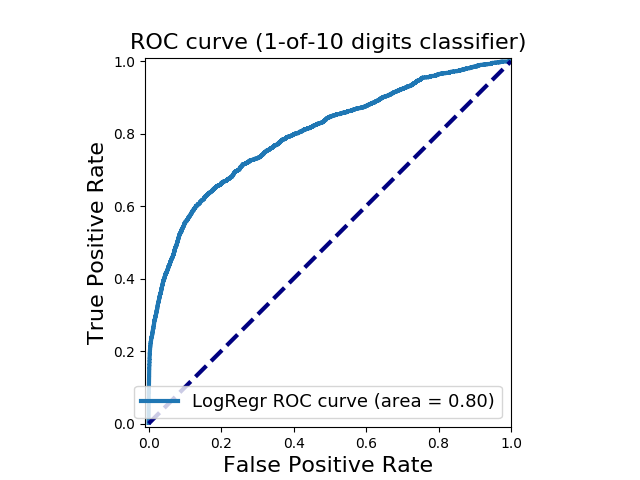

In [80]:
def draw_roc_curve():
    %matplotlib notebook
    import matplotlib.pyplot as plt
    from sklearn.metrics import roc_curve, auc

    fpr_lr, tpr_lr, _ = roc_curve(y_test, test_pro[:,1])
    roc_auc_lr = auc(fpr_lr, tpr_lr)

    plt.figure()
    plt.xlim([-0.01, 1.00])
    plt.ylim([-0.01, 1.01])
    plt.plot(fpr_lr, tpr_lr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_lr))
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('ROC curve (1-of-10 digits classifier)', fontsize=16)
    plt.legend(loc='lower right', fontsize=13)
    plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
    plt.axes().set_aspect('equal')
    plt.show()
    
draw_roc_curve()

In [81]:
test_pro[0:10]

array([[ 0.96572847,  0.03427153],
       [ 0.91296367,  0.08703633],
       [ 0.96576155,  0.03423845],
       [ 0.97263629,  0.02736371],
       [ 0.97294984,  0.02705016],
       [ 0.97802355,  0.02197645],
       [ 0.93792253,  0.06207747],
       [ 0.68663859,  0.31336141],
       [ 0.80783137,  0.19216863],
       [ 0.96927337,  0.03072663]])

In [83]:
clf.predict(X_test_scaled[0:10])

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [84]:
y_test[0:10]

ticket_id
21415     1.0
148548    1.0
178261    0.0
224898    0.0
191251    0.0
224988    0.0
36156     0.0
58005     1.0
196982    0.0
60158     0.0
Name: compliance, dtype: float64

In [86]:
1 - y_train.sum()/len(y_train)

0.92750271587055999

In [88]:
from sklearn.metrics import recall_score, precision_score, f1_score

test_pred = clf.predict(X_test_scaled)
print(precision_score(y_test, test_pred),
      recall_score(y_test, test_pred),
      f1_score(y_test, test_pred))

0.842794759825 0.174898051654 0.289681050657


28289
0
0


<IPython.core.display.Javascript object>


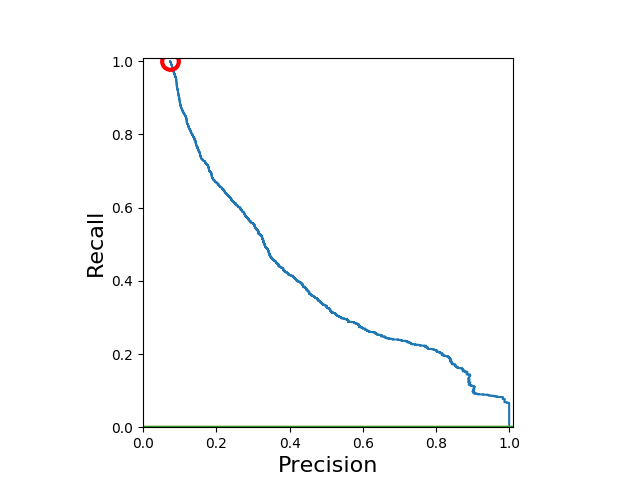

In [94]:
def draw_pr_curve():
    from sklearn.metrics import precision_recall_curve
    from sklearn.metrics import roc_curve, auc

    precision, recall, thresholds = precision_recall_curve(y_test, test_pro[:,1])
    print(len(thresholds))
    idx = min(range(len(thresholds)), key=lambda i: abs(a[i]-11.5))
    print(np.argmin(np.abs(thresholds)))
    print(np.argmin(np.abs(thresholds)))
    
    closest_zero = np.argmin(np.abs(thresholds))
    closest_zero_p = precision[closest_zero]
    closest_zero_r = recall[closest_zero]

    import matplotlib.pyplot as plt
    plt.figure()
    plt.xlim([0.0, 1.01])
    plt.ylim([0.0, 1.01])
    plt.plot(precision, recall, label='Precision-Recall Curve')
    plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
    plt.xlabel('Precision', fontsize=16)
    plt.ylabel('Recall', fontsize=16)
    plt.axes().set_aspect('equal')
    plt.show()
    
    return thresholds

thresholds = draw_pr_curve()

<IPython.core.display.Javascript object>


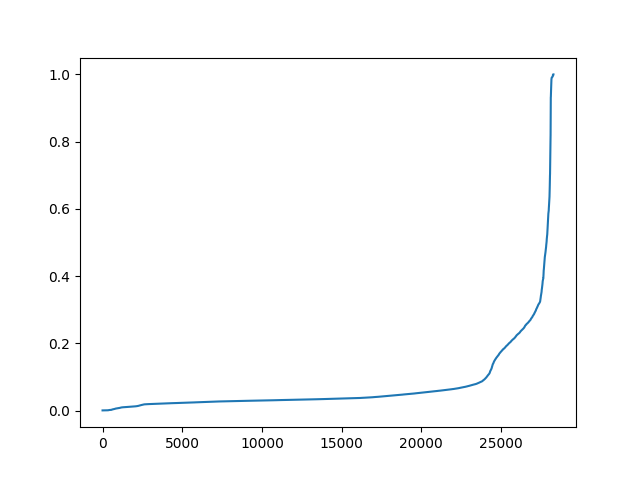

In [98]:
import matplotlib.pyplot as plt
%matplotlib notebook
plt.plot(thresholds)
plt.show()